## 1. Load the Dataset
Load the dataset for analysis and modeling.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('pharmacovigilance_dataset_with_conditions.csv')
df.head()

,Gender,Pregnancy Status,Rechallenge,Dechallenge,Severity,Is Reaction Serious,Reason for Seriousness,Action Taken,Outcome,Causality Assessment
0,Female,1st Trimester,Unknown,NaN,Unknown,No,NaN,Unknown,Not recovered,Conditional/Unclassified
1,Female,Not applicable,No,No,Severe,Yes,Disability,Drug withdrawn,Recovering,Probable/Likely
2,Female,2nd Trimester,NaN,No,Mild,Yes,NaN,Recovering,Recovered,Possible
3,Male,Not applicable,Unknown,Yes,Severe,Yes,Hospitalisation,Drug withdrawn,Recovering,Probable/Likely
4,Male,3rd Trimester,NaN,NaN,Unknown,No,NaN,Unknown,Not recovered,Unassessable/Unclassifiable


## 2. Exploratory Data Analysis (EDA)
### Numerical EDA


In [2]:
# Check for missing values
print(df.isnull().sum())

Gender                      0
Pregnancy Status            0
Rechallenge               510
Dechallenge               147
Severity                    0
Is Reaction Serious         0
Reason for Seriousness    513
Action Taken                0
Outcome                     0
Causality Assessment        0
dtype: int64


In [3]:
# Summary statistics
print(df.describe())

        Gender Pregnancy Status Rechallenge Dechallenge Severity  \
count     1000             1000         490         853     1000   
unique       2                4           3           3        4   
top     Female   Not applicable     Unknown          No  Unknown   
freq       520              630         290         405      361   

       Is Reaction Serious Reason for Seriousness Action Taken        Outcome  \
count                 1000                    487         1000           1000   
unique                   2                      3            6              3   
top                     No        Hospitalisation      Unknown  Not recovered   
freq                   535                    229          390            551   

       Causality Assessment  
count                  1000  
unique                    6  
top                Possible  
freq                    300  


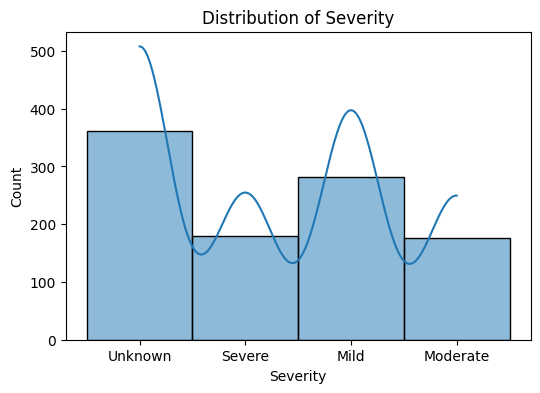

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numerical features
numerical_cols = ['Severity']  # Replace with actual numerical columns if applicable
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### Categorical EDA


In [5]:
# Unique value counts
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col} unique values:\n", df[col].value_counts(), "\n")

Gender unique values:
 Gender
Female    520
Male      480
Name: count, dtype: int64 

Pregnancy Status unique values:
 Pregnancy Status
Not applicable    630
3rd Trimester     131
1st Trimester     120
2nd Trimester     119
Name: count, dtype: int64 

Rechallenge unique values:
 Rechallenge
Unknown    290
No         100
Yes        100
Name: count, dtype: int64 

Dechallenge unique values:
 Dechallenge
No         405
Yes        395
Unknown     53
Name: count, dtype: int64 

Severity unique values:
 Severity
Unknown     361
Mild        282
Severe      180
Moderate    177
Name: count, dtype: int64 

Is Reaction Serious unique values:
 Is Reaction Serious
No     535
Yes    465
Name: count, dtype: int64 

Reason for Seriousness unique values:
 Reason for Seriousness
Hospitalisation     229
Life threatening    145
Disability          113
Name: count, dtype: int64 

Action Taken unique values:
 Action Taken
Unknown           390
Drug withdrawn    155
Dose reduced      145
Not applicable    11

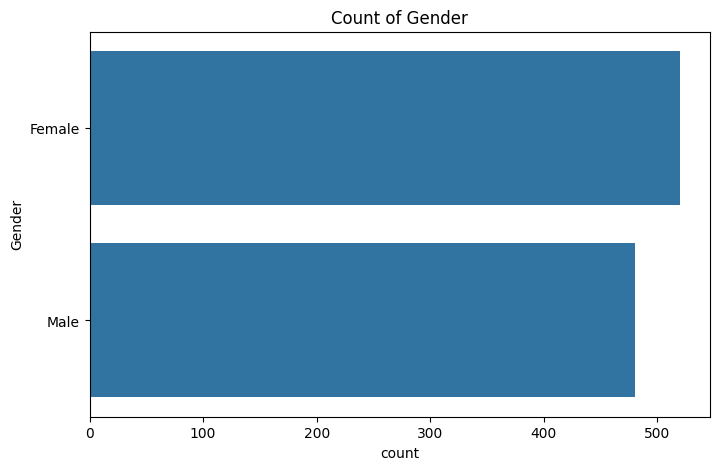

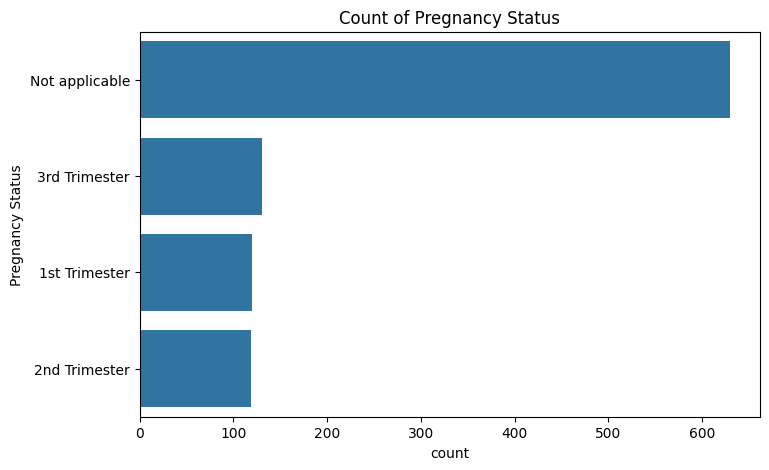

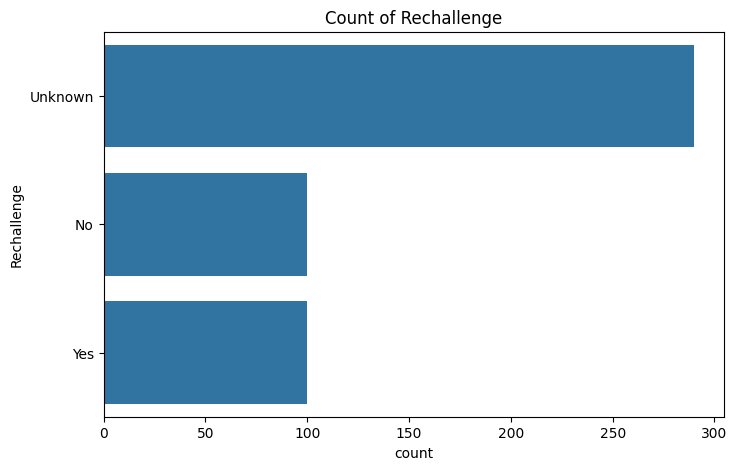

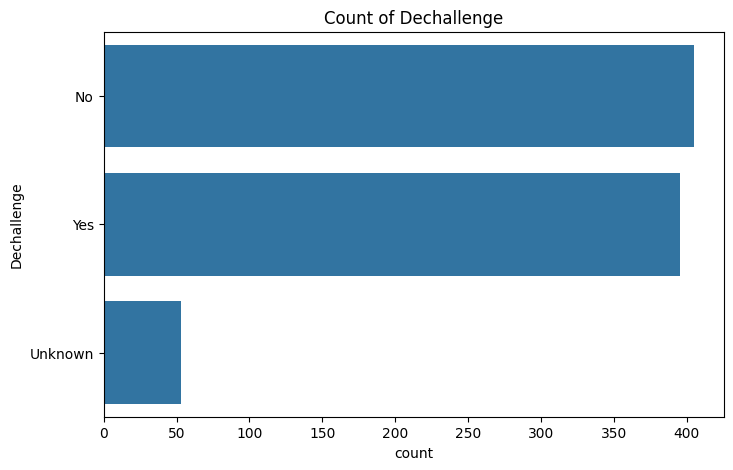

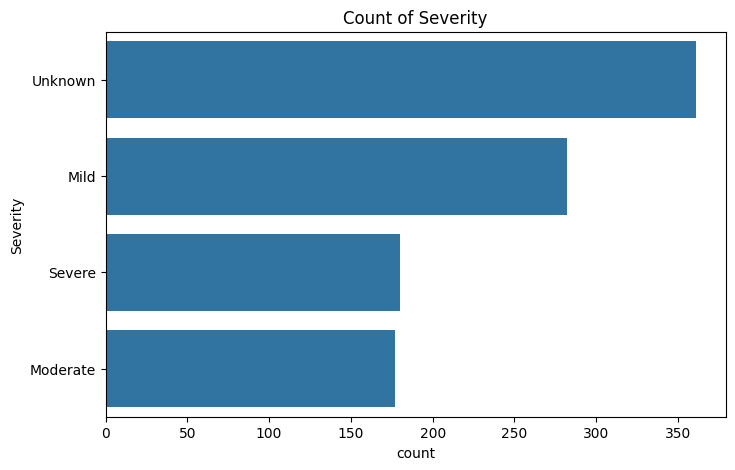

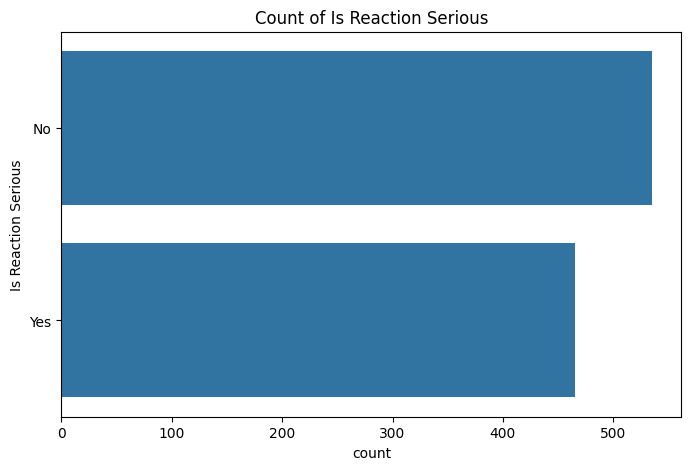

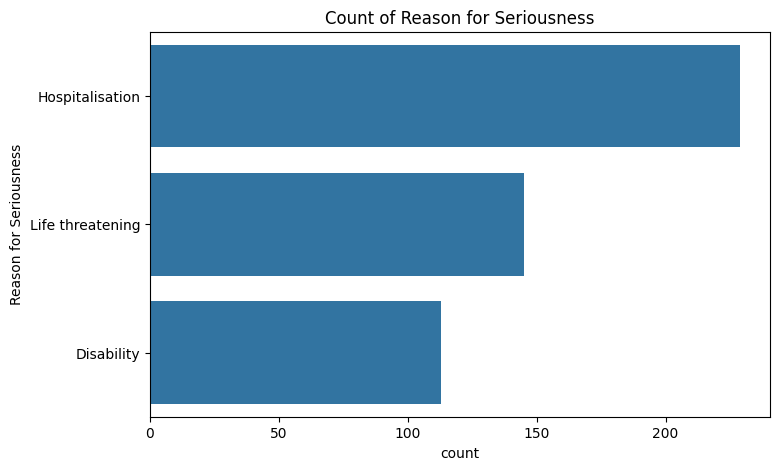

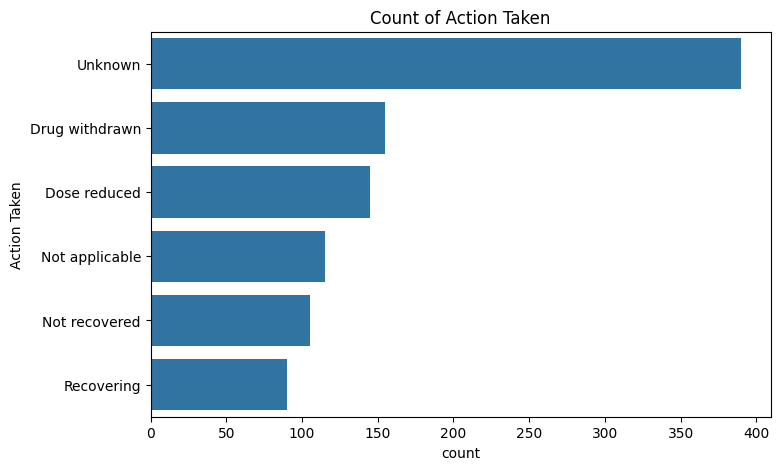

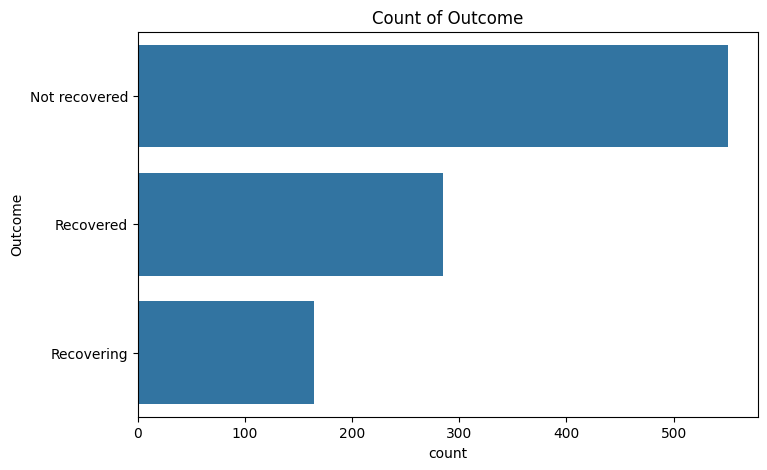

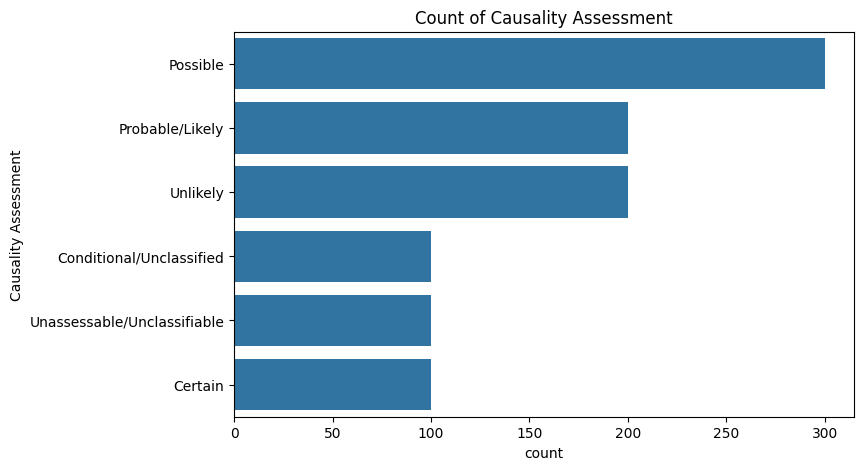

In [6]:
# Bar plots for categorical features
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.show()

## 3. Data Preprocessing


In [7]:
# Handle missing values
df.fillna('Unknown', inplace=True)  # Replace missing values with 'Unknown'

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature selection
X = df.drop(columns=['Causality Assessment'])  # Replace with actual target column
y = df['Causality Assessment']

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Build and Train the Classification Model


In [8]:
# Train a Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.48      0.57      0.52        21
           2       1.00      0.99      0.99        76
           3       1.00      1.00      1.00        29
           4       0.53      0.43      0.48        23
           5       0.97      1.00      0.98        31

    accuracy                           0.89       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.89      0.89      0.88       200

Accuracy: 0.885


## 5. Feature Importance


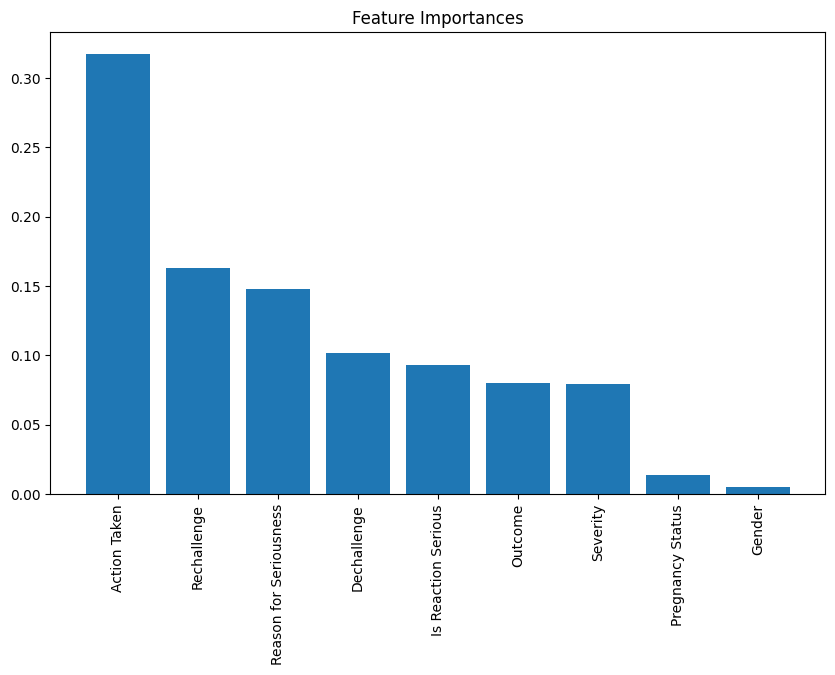

In [9]:
import numpy as np

# Feature importance visualization
feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.title('Feature Importances')
plt.show()

## 6. Save the Model


In [10]:
# Save the trained model
import joblib

joblib.dump(model, 'pharmacovigilance_classifier.pkl')

['pharmacovigilance_classifier.pkl']